<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


- Visualize the distribution of data

- Visualize the relationship between two features

- Visualize the composition of data

- Visualize comparison of data


## Setup: Working with the Database

**Install the needed libraries**


In [1]:
!pip install pandas


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install matplotlib


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.


In [18]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("cleaned_survey_data_V2.csv")
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")



# Display the first few rows to understand the structure of the data
df.head()


'wget' is not recognized as an internal or external command,
operable program or batch file.


,ResponseId,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,...,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,ExperienceRange
0,73,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)",Other,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,...,100.0,100.0,100.0,50.0,90.0,Too long,Easy,7322.0,10,0-5
1,380,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Hobby;Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books;Social Media;Wri...,API document(s) and/or SDK document(s),...,0.0,0.0,0.0,0.0,0.0,Too long,Difficult,91295.0,10,5-10
2,390,I am a developer by profession,25-34 years old,"Employed, full-time;Student, part-time",Remote,Hobby;School or academic work,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,Other,...,30.0,5.0,20.0,10.0,5.0,Too long,Easy,110000.0,10,5-10
3,393,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Other,Technical documentation;Blogs;Written Tutorial...,Other,...,5.0,10.0,0.0,0.0,5.0,Appropriate in length,Neither easy nor difficult,161044.0,7,10-20
4,399,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Other,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,...,10.0,30.0,0.0,0.0,0.0,Appropriate in length,Easy,195000.0,5,>20


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.


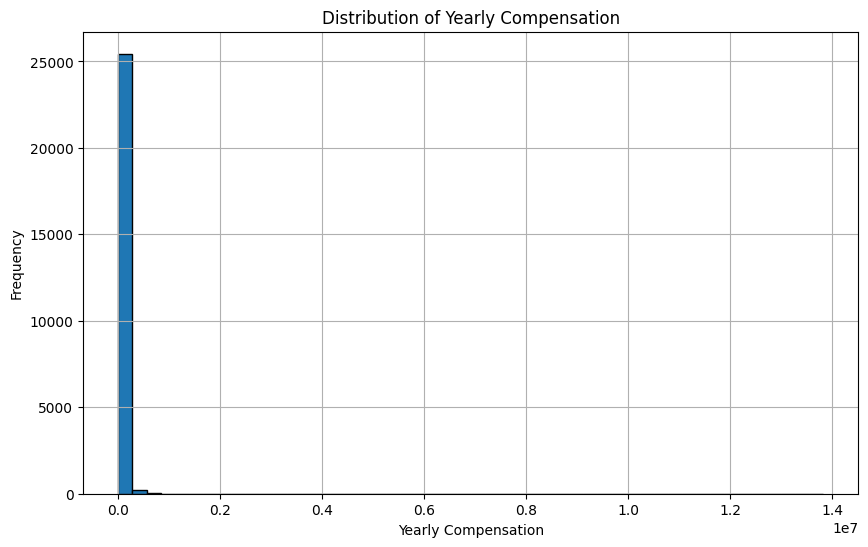

In [20]:
## Write your code here
# Plotting the histogram of ConvertedCompYearly
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedCompYearly'].dropna(), bins=50, edgecolor='k')
plt.title('Distribution of Yearly Compensation')
plt.xlabel('Yearly Compensation')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.


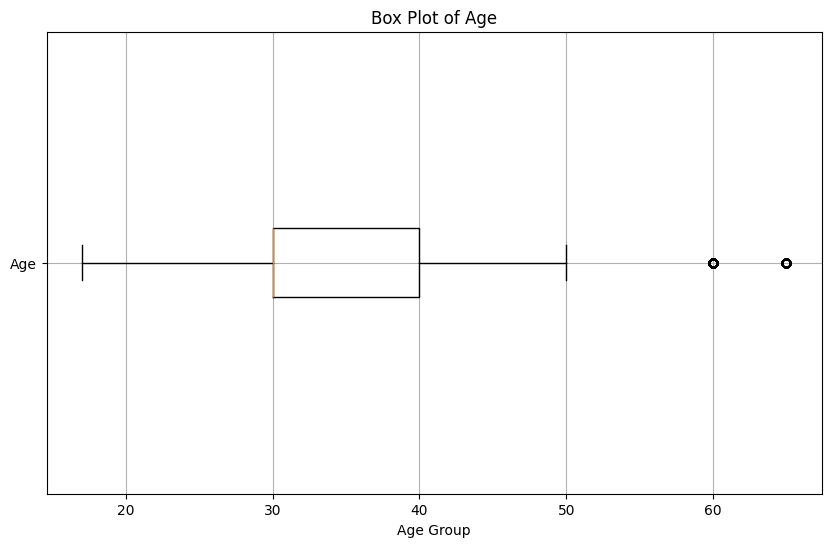

In [24]:
## Write your code here
# Convert Age to numerical values
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 65
}
df['Age_numeric'] = df['Age'].map(age_mapping)

# Plotting the box plot of Age
plt.figure(figsize=(10, 6))
plt.boxplot(df['Age_numeric'].dropna(), vert=False)
plt.title('Box Plot of Age')
plt.xlabel('Age Group')
plt.yticks([1], ['Age'])
plt.grid(True)
plt.show()

### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.


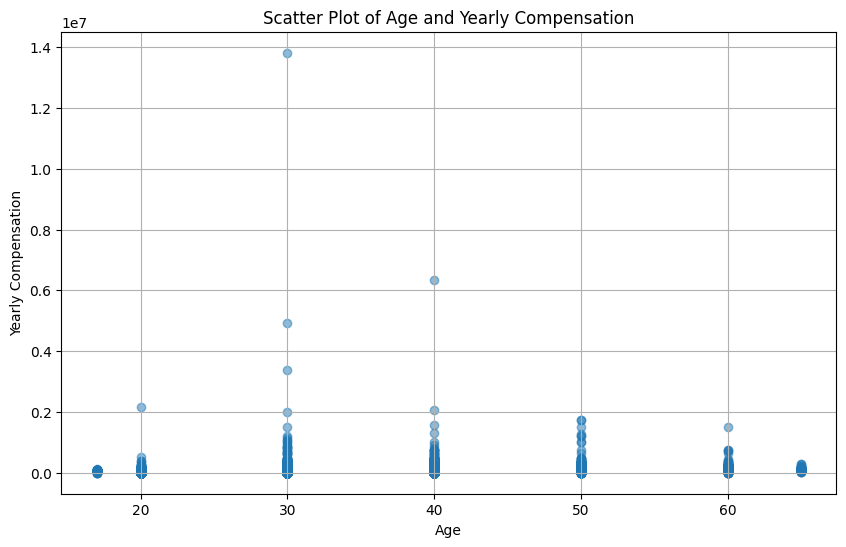

In [25]:
## Write your code here
# Scatter Plot of Age_numeric and ConvertedCompYearly
plt.figure(figsize=(10, 6))
plt.scatter(df['Age_numeric'], df['ConvertedCompYearly'], alpha=0.5)
plt.title('Scatter Plot of Age and Yearly Compensation')
plt.xlabel('Age')
plt.ylabel('Yearly Compensation')
plt.grid(True)
plt.show()

##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


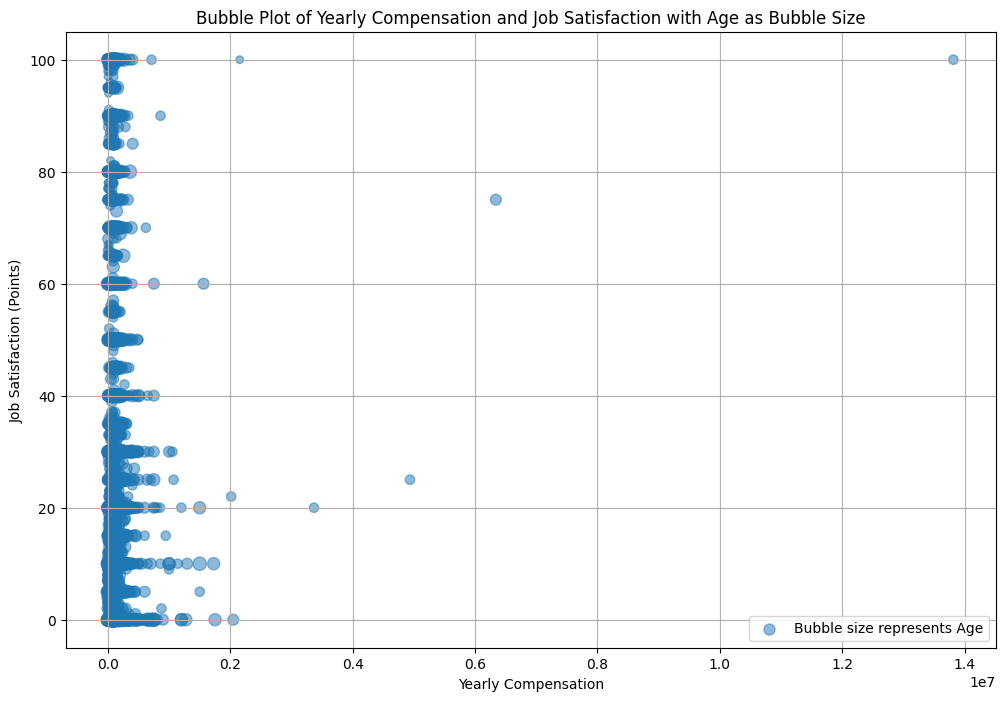

In [28]:
## Write your code here
# Bubble Plot of ConvertedCompYearly and JobSatPoints_6 with Age_numeric as Bubble Size
plt.figure(figsize=(12, 8))
bubble_size = df['Age_numeric'] / df['Age_numeric'].max() * 100  # Normalize bubble size
colors = df['ResponseId']  # Use ResponseId to color the bubbles
plt.scatter(df['ConvertedCompYearly'], df['JobSatPoints_6'], s=bubble_size, alpha=0.5)
plt.title('Bubble Plot of Yearly Compensation and Job Satisfaction with Age as Bubble Size')
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction (Points)')
plt.legend(['Bubble size represents Age'])
plt.grid(True)
plt.show()

### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.


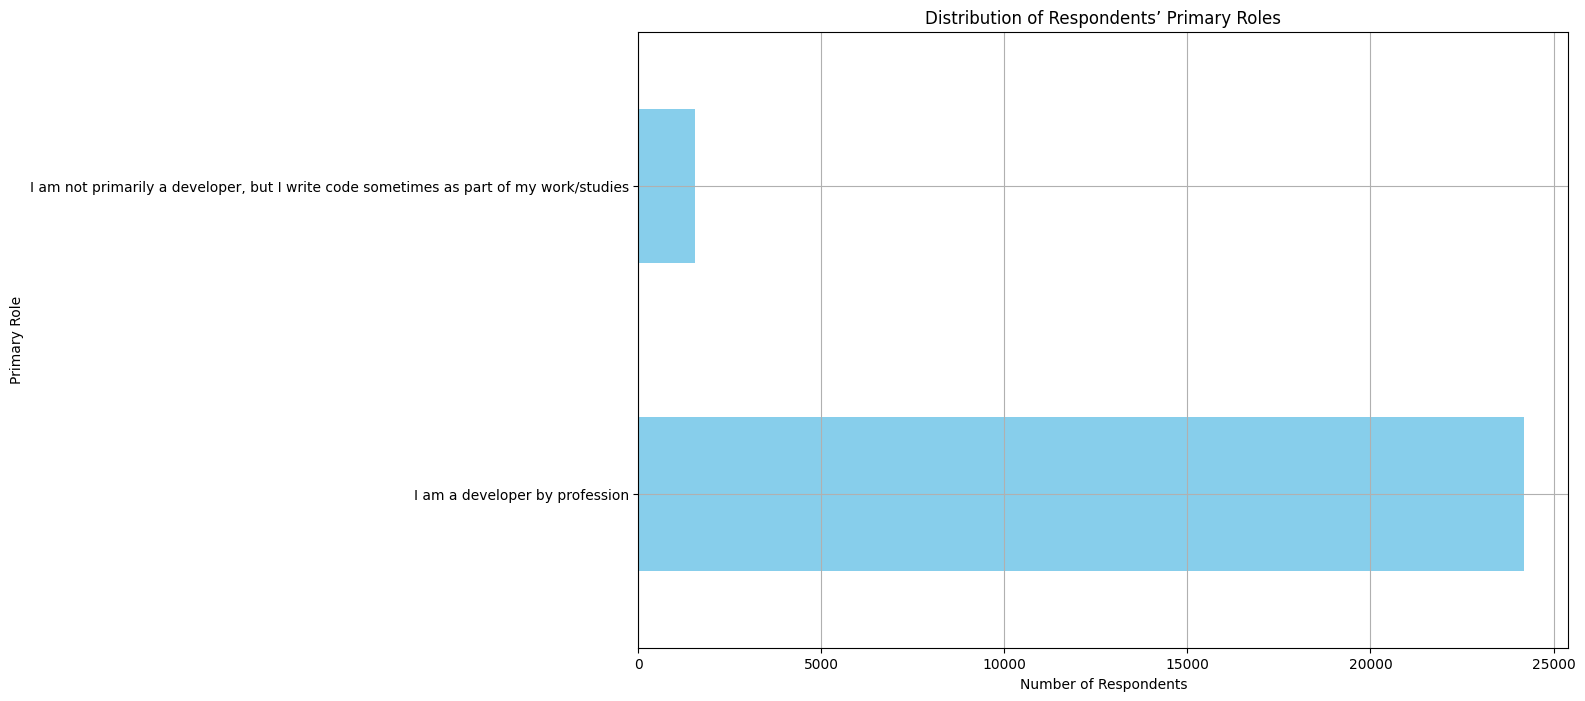

In [29]:
## Write your code here
# Plotting the horizontal bar chart of MainBranch distribution
plt.figure(figsize=(12, 8))
main_branch_counts = df['MainBranch'].value_counts()
main_branch_counts.plot(kind='barh', color='skyblue')
plt.title('Distribution of Respondents’ Primary Roles')
plt.xlabel('Number of Respondents')
plt.ylabel('Primary Role')
plt.grid(True)
plt.show()

##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.


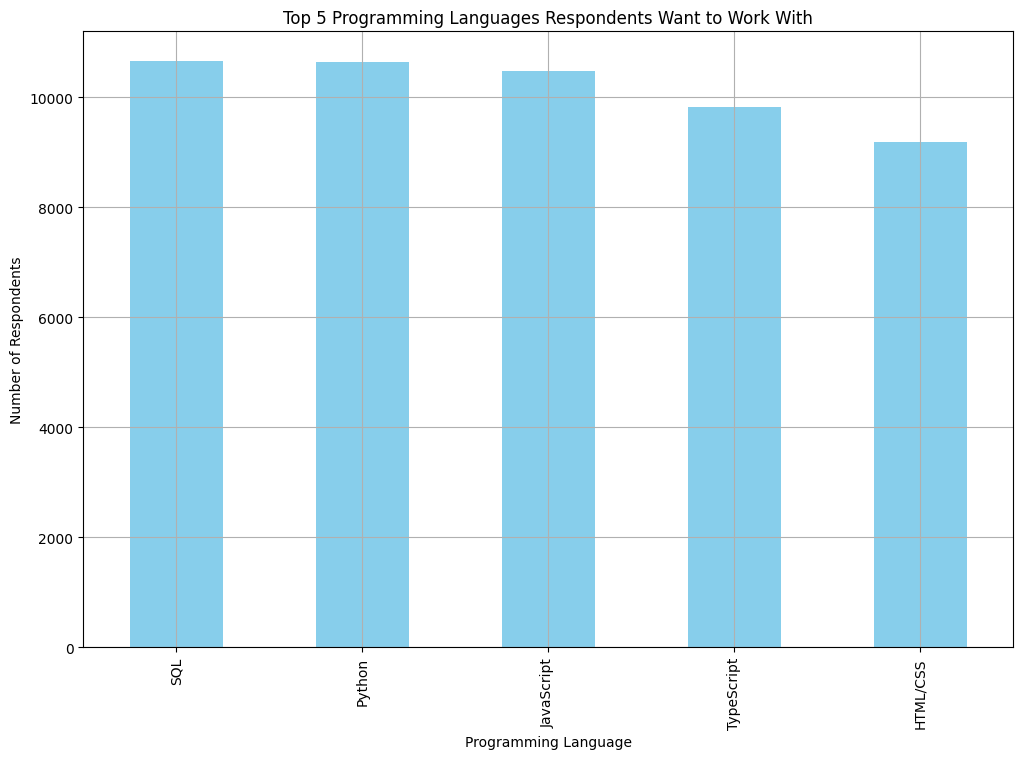

In [30]:
## Write your code here
# Extract the top 5 programming languages respondents want to work with
top_languages = df['LanguageWantToWorkWith'].str.split(';').explode().value_counts().head(5)

# Plotting the vertical bar chart
plt.figure(figsize=(12, 8))
top_languages.plot(kind='bar', color='skyblue')
plt.title('Top 5 Programming Languages Respondents Want to Work With')
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.show()

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


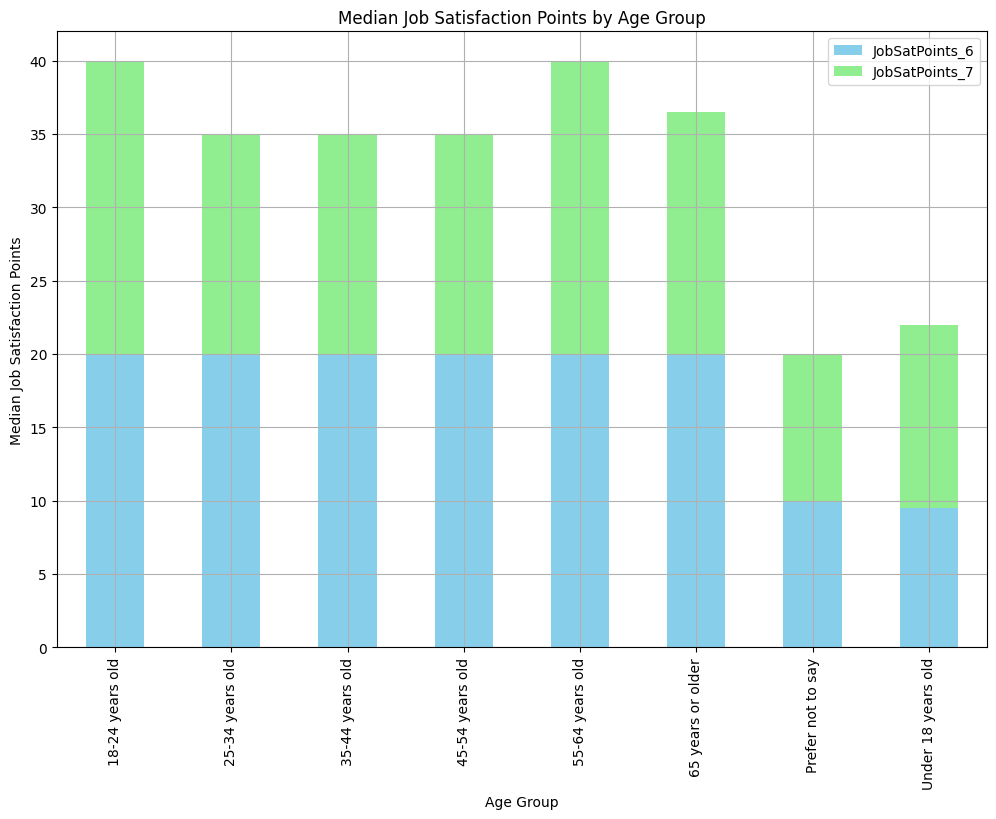

In [32]:
## Write your code here
# Calculate median JobSatPoints_6 and JobSatPoints_7 by Age Group
median_job_sat = df.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Plotting the stacked bar chart
median_job_sat.plot(kind='bar', stacked=True, figsize=(12, 8), color=['skyblue', 'lightgreen'])
plt.title('Median Job Satisfaction Points by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Job Satisfaction Points')
plt.legend(['JobSatPoints_6', 'JobSatPoints_7'])
plt.grid(True)
plt.show()

##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.


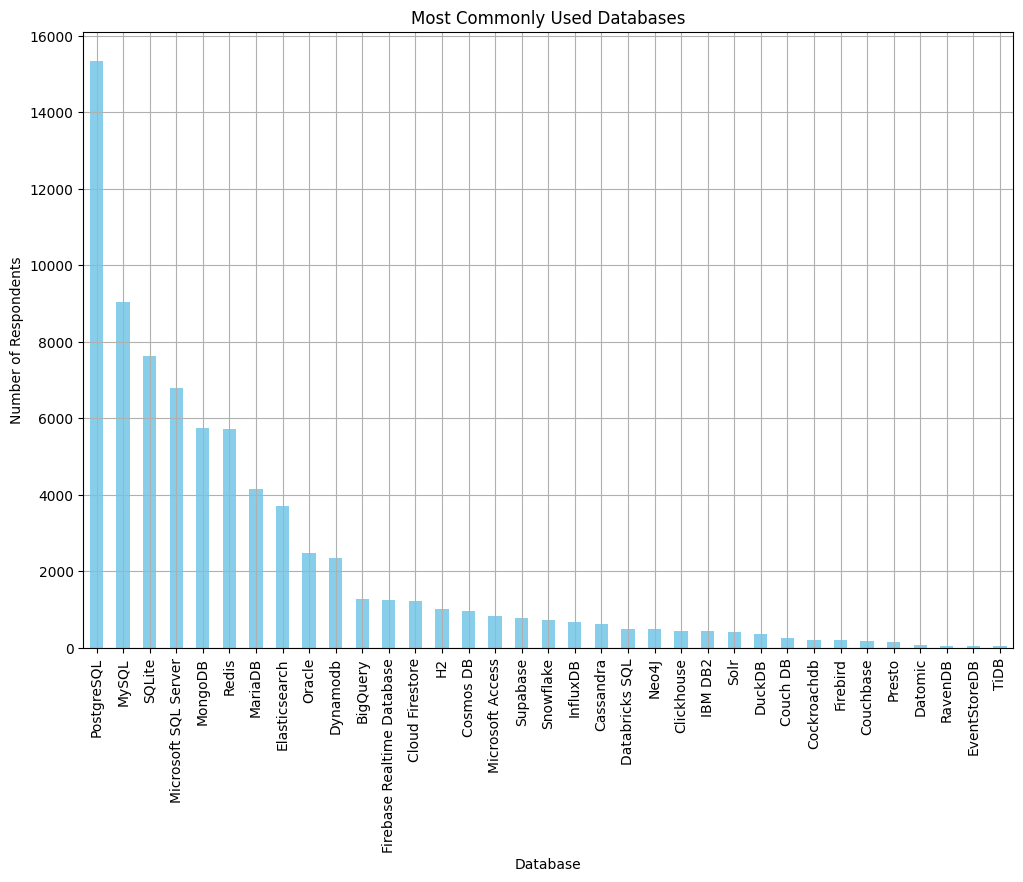

In [33]:
## Write your code here
# Extract the most commonly used databases
database_counts = df['DatabaseHaveWorkedWith'].str.split(';').explode().value_counts()

# Plotting the bar chart
plt.figure(figsize=(12, 8))
database_counts.plot(kind='bar', color='skyblue')
plt.title('Most Commonly Used Databases')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.show()

### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.


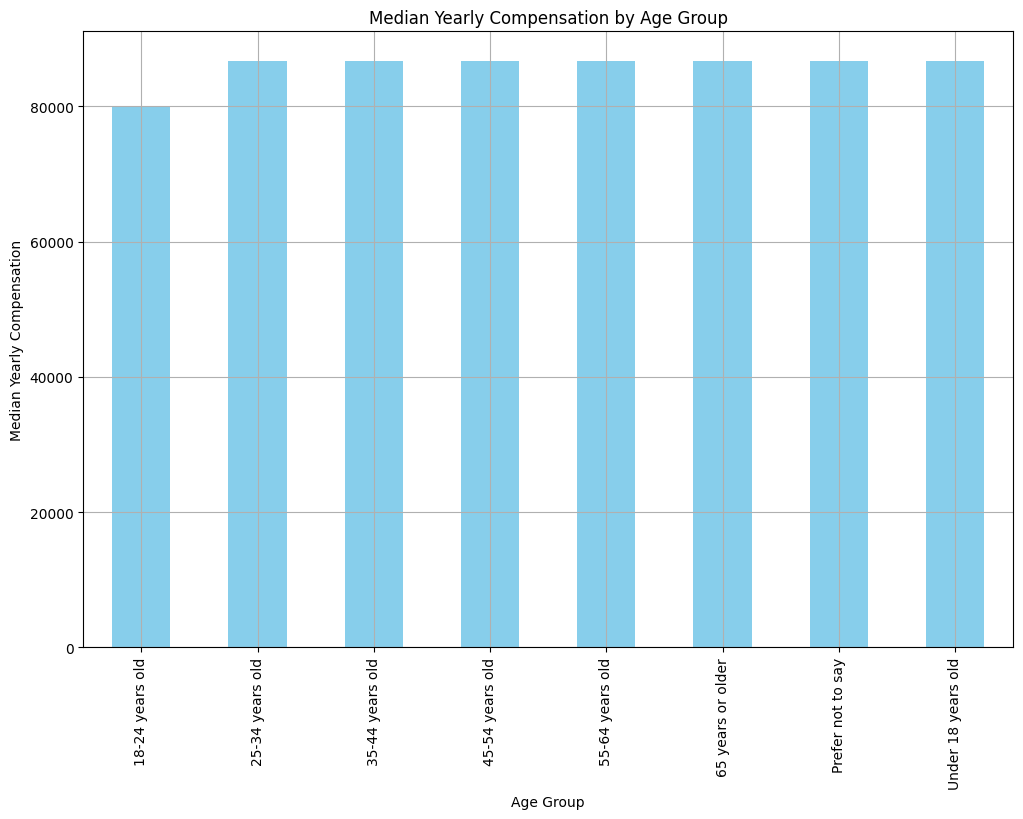

In [34]:
## Write your code here
# Calculate median ConvertedCompYearly by Age Group
median_comp_by_age = df.groupby('Age')['ConvertedCompYearly'].median()

# Plotting the grouped bar chart
plt.figure(figsize=(12, 8))
median_comp_by_age.plot(kind='bar', color='skyblue')
plt.title('Median Yearly Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Yearly Compensation')
plt.grid(True)
plt.show()

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.


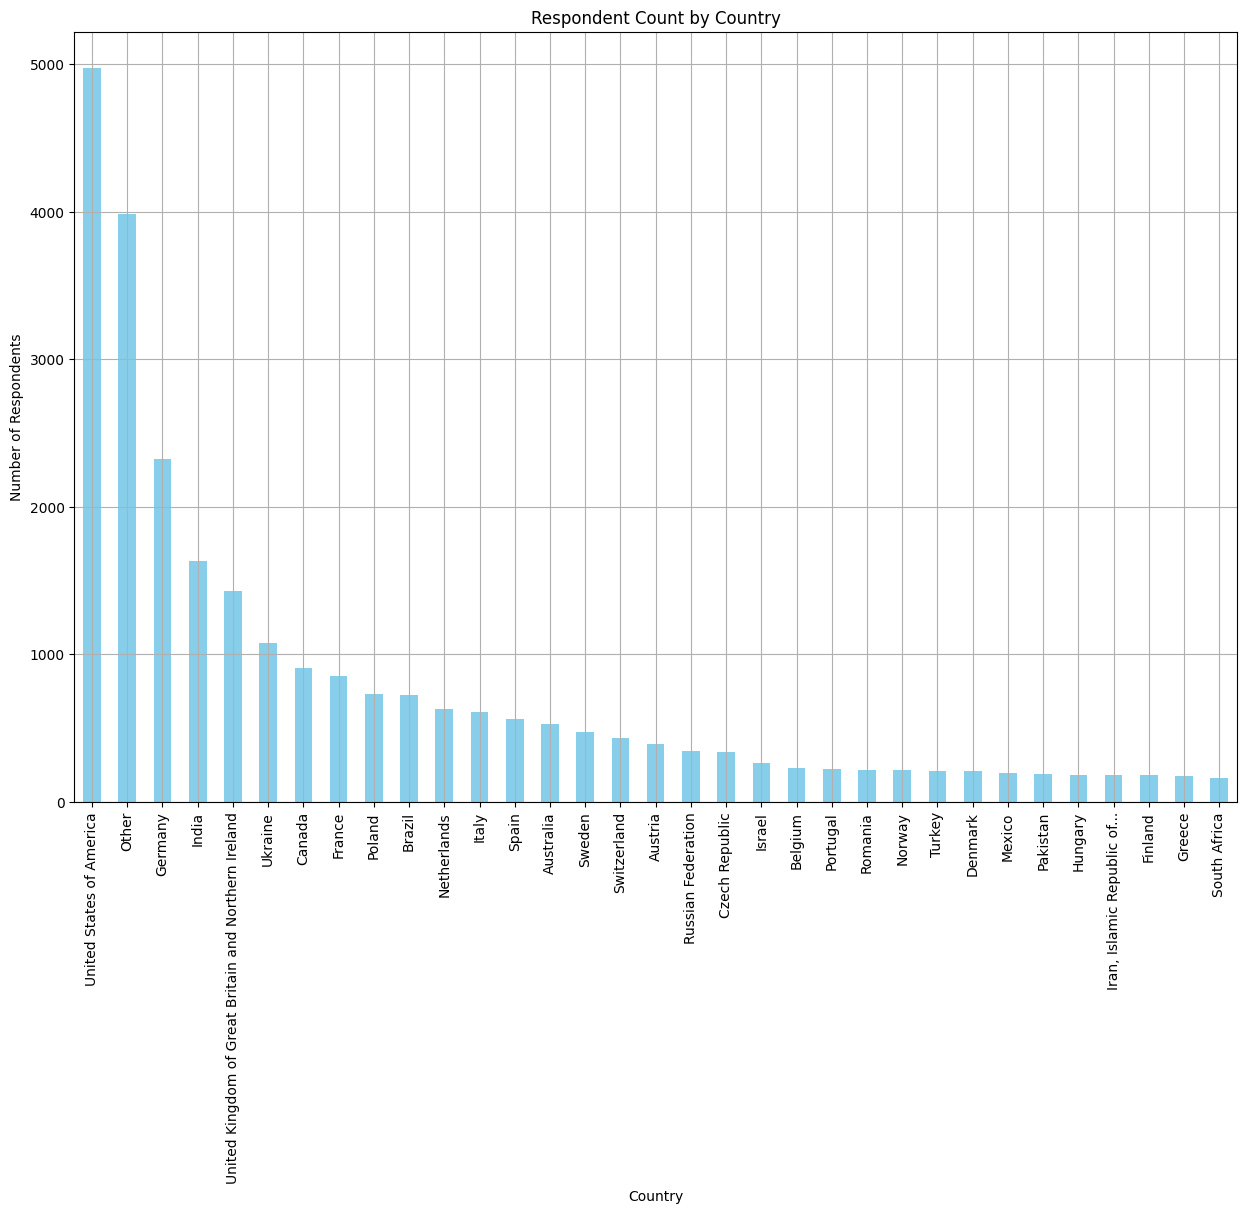

In [35]:
## Write your code here
# Plotting the bar chart of respondent count by country
plt.figure(figsize=(15, 10))
country_counts = df['Country'].value_counts()
country_counts.plot(kind='bar', color='skyblue')
plt.title('Respondent Count by Country')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.show()

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:

- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:

Ayushi Jain


### Other Contributors:

- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
